# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dados_sinasc = pd.read_csv('sinasc_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
#criando rotulos 
intervalos = [0, 3, 5, 7, 10]
rotulos = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

dados_sinasc['APGAR5_Categoria'] = pd.cut(dados_sinasc['APGAR5'], bins=intervalos, labels=rotulos)

print(dados_sinasc[['APGAR5', 'APGAR5_Categoria']].head())


   APGAR5 APGAR5_Categoria
0    10.0           normal
1     9.0           normal
2    10.0           normal
3    10.0           normal
4    10.0           normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

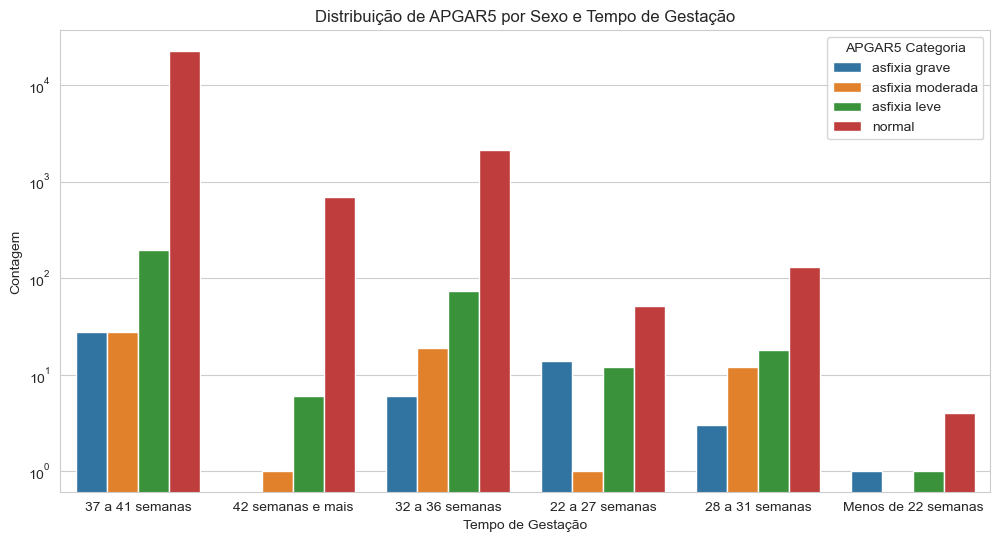

In [16]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.countplot(data=dados_sinasc, x='GESTACAO', hue='APGAR5_Categoria')

plt.yscale("log")
plt.xlabel("Tempo de Gestação")
plt.ylabel("Contagem")
plt.title("Distribuição de APGAR5 por Sexo e Tempo de Gestação")
plt.legend(title="APGAR5 Categoria")

plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [4]:
#tabela cruzada
tabela_cruzada = pd.crosstab(dados_sinasc['GESTACAO'], dados_sinasc['APGAR5_Categoria'])

print(tabela_cruzada)


APGAR5_Categoria     asfixia grave  asfixia moderada  asfixia leve  normal
GESTACAO                                                                  
22 a 27 semanas                 14                 1            12      51
28 a 31 semanas                  3                12            18     129
32 a 36 semanas                  6                19            73    2134
37 a 41 semanas                 28                28           196   22266
42 semanas e mais                0                 1             6     690
Menos de 22 semanas              1                 0             1       4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [5]:
# calculando a tabela cruzada
tabela_cruzada = pd.crosstab(dados_sinasc['GESTACAO'], dados_sinasc['APGAR5_Categoria'])

# calculando os percentuais de linha
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

print(percentuais_linha)


APGAR5_Categoria     asfixia grave  asfixia moderada  asfixia leve     normal
GESTACAO                                                                     
22 a 27 semanas          17.948718          1.282051     15.384615  65.384615
28 a 31 semanas           1.851852          7.407407     11.111111  79.629630
32 a 36 semanas           0.268817          0.851254      3.270609  95.609319
37 a 41 semanas           0.124345          0.124345      0.870415  98.880895
42 semanas e mais         0.000000          0.143472      0.860832  98.995696
Menos de 22 semanas      16.666667          0.000000     16.666667  66.666667


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Figure size 1200x600 with 0 Axes>

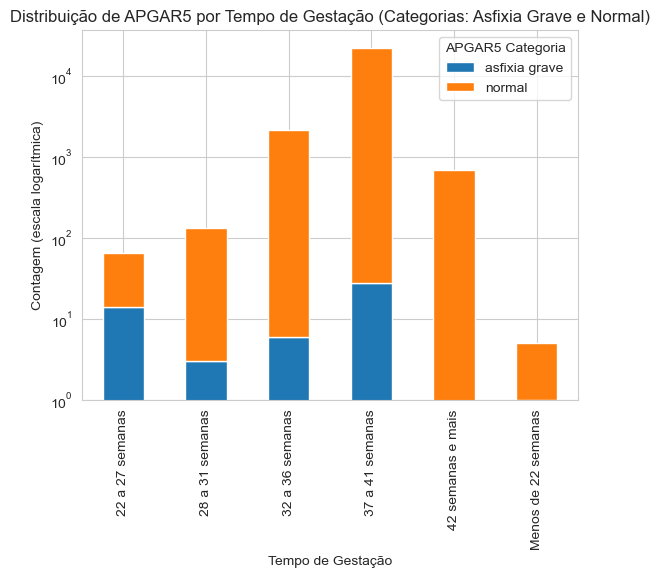

In [14]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# considerando apenas as categorias "asfixia grave" e "normal" para este exemplo
categorias_interesse = ["asfixia grave", "normal"]

# tabela cruzada apenas para as categorias de interesse
tabela_cruzada_filtrada = tabela_cruzada[categorias_interesse]

tabela_cruzada_filtrada.plot(kind='bar', stacked=True)
plt.yscale("log")  #escala logarítmica no eixo y
plt.xlabel("Tempo de Gestação")
plt.ylabel("Contagem (escala logarítmica)")
plt.title("Distribuição de APGAR5 por Tempo de Gestação (Categorias: Asfixia Grave e Normal)")
plt.legend(title="APGAR5 Categoria")

plt.show()


Os médicos de fato tem razão segundo esse gráfico,usando apenas a faixa normal e de asfixia grave, bebes com tempo de gestação menor do que 37 semanas tem muito mais chances de terem problemas respiratorios.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

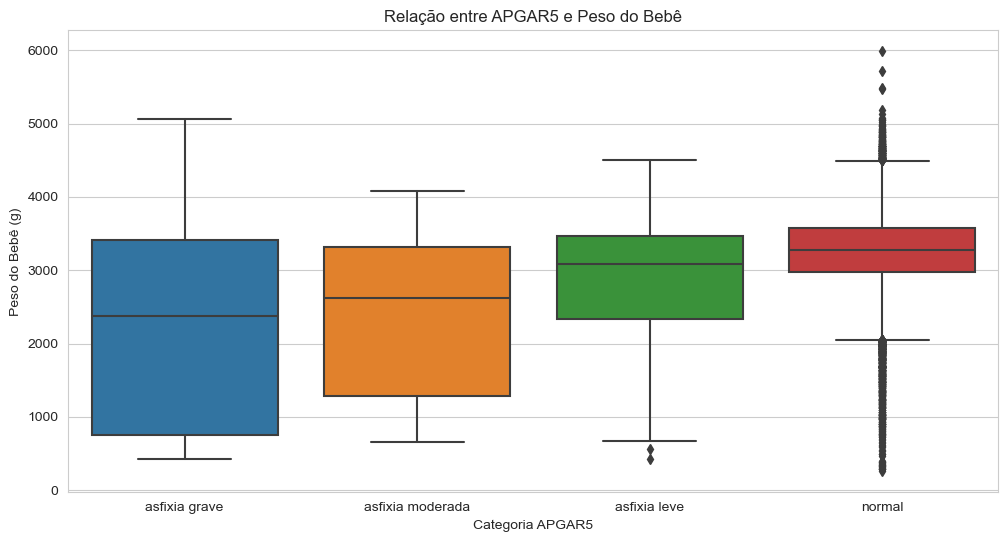

In [7]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.boxplot(data=dados_sinasc, x='APGAR5_Categoria', y='PESO', order=rotulos)
plt.xlabel("Categoria APGAR5")
plt.ylabel("Peso do Bebê (g)")
plt.title("Relação entre APGAR5 e Peso do Bebê")

plt.show()


Percebemos que quanto menos pesado o bebê maior a chance de terem problemas respiratórios 